This is the notebook I use to merge different datasets together.

In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import merging_functions as mf
import os

from merging_functions import state_counts
years = mf.years

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Access and define functions for reading the wikipedia-extracted entries

In [12]:
state = "ME"
alperin,wiki,cesta = state_counts(state)
a = alperin
b = wiki


matches = mf.match_matrices(alperin[1],wiki[1],min=2,sources = (alperin[0],wiki[0]))
as_a = set([m['a'] for m in matches])
as_b = set([m['b'] for m in matches])

only_b = set(range(len(b[1]))).difference(as_b)
only_a = set(range(len(a[1]))).difference(as_a)




529 matches between the sets


In [18]:
print "Just Alperin"
print a[0].iloc[list(only_a)]["Alperin_Place"]

print "\n\nJust Wikipedia, not Alperin"
print b[0].iloc[list(only_b)]["title"]

Just Alperin
259                                 Louds Island
388                                     Rangeley
307                         Muscle Ridge Islands
362     Passamaquoddy Pleasant Point Reservation
365          Penobscot Indian Island Reservation
366          Penobscot Indian Island Reservation
369                                      Perkins
275                              Marshall Island
361    Passamaquoddy Indian Township Reservation
250                                      Lincoln
Name: Alperin_Place, dtype: object


Just Wikipedia, not Alperin
93                           Maine
186                 Deering, Maine
368    Loring Air Force Base (CDP)
Name: title, dtype: object


Deering is a neighborhood of portland independent in the late 19th century. 

Rangeley is missing from Wikipedia b/c, I guess, wikipedia somehow has two population boxes. (One for the plantation, one for the town, probably?).

Perkins vanishes mid-19C: not sure why Alperin has it, not Wikipedia. Should be the other way 'round.

In [19]:
def complete_merge(state="AR"):
    alperin,wiki,cesta = state_counts(state)
    alp_wik_merge = mf.merge_two_sets(alperin,wiki)
    full_merge = mf.merge_two_sets(alp_wik_merge,cesta)
    return full_merge

complete_merge()[0]

505 matches between the sets
617 matches between the sets


,Alperin_County,Alperin_Place,COUSUB,Census_Name_2010,City,City Source,CityST,County,County_Name,Incorporation Date,...,country,id,lat,lon,other_years,poptype,settlement_type,state,title,wiki_pops
0,Perry County,Adona city,NaN,NaN,Adona,Arkansas State Data Center,"Adona, AR",Perry,NaN,NaN,...,US,107172.0,35.039444,-92.898889,NaN,Census,City,AR,"Adona, Arkansas","209,187,146,230,204,154,194,218,200,241,0,0,0,..."
1,Pulaski County,Alexander city,NaN,Alexander city,Alexander,US Census Bureau,"Alexander, AR",Pulaski And Saline,NaN,NaN,...,US,107215.0,34.631389,-92.444167,NaN,Census,City,AR,"Alexander, Arkansas","2901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"
2,Lawrence County,Alicia town,NaN,NaN,Alicia,Arkansas State Data Center,"Alicia, AR",Lawrence,NaN,NaN,...,US,107071.0,35.894444,-91.083611,NaN,Census,Town,AR,"Alicia, Arkansas","124,145,157,246,246,236,299,333,342,297,168,15..."
3,Lonoke County,Allport town,NaN,NaN,Allport,Arkansas State Data Center,"Allport, AR",Lonoke,NaN,NaN,...,US,107108.0,34.539444,-91.785000,NaN,Census,Town,AR,"Allport, Arkansas","115,127,188,295,307,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4,Crawford County,Alma city,NaN,Alma city,Alma,US Census Bureau,"Alma, AR",Crawford,Crawford,NaN,...,US,106928.0,35.488056,-94.220833,NaN,Census,City,AR,"Alma, Arkansas","5419,4160,2959,2755,1613,1370,1228,774,731,779..."
5,Arkansas County,Almyra town,NaN,NaN,Almyra,Arkansas State Data Center,"Almyra, AR",Arkansas,NaN,NaN,...,US,106807.0,34.405833,-91.411944,NaN,Census,Town,AR,"Almyra, Arkansas","283,319,311,294,220,240,235,233,287,323,252,0,..."
6,Boone County,Alpena town,NaN,NaN,Alpena,Arkansas State Data Center,"Alpena, AR",Boone,NaN,NaN,...,US,106853.0,36.293611,-93.296111,NaN,Census,Town,AR,"Alpena, Arkansas","392,371,319,344,309,283,304,313,361,250,0,0,0,..."
7,Jefferson County,Altheimer city,NaN,NaN,Altheimer,Arkansas State Data Center,"Altheimer, AR",Jefferson,NaN,NaN,...,US,107056.0,34.319250,-91.847361,NaN,Census,City,AR,"Altheimer, Arkansas","984,1192,972,1231,1037,979,680,494,475,450,0,0..."
8,Franklin County,Altus city,NaN,NaN,Altus,Arkansas State Data Center,"Altus, AR",Franklin,NaN,NaN,...,US,106979.0,35.454722,-93.771944,NaN,Census,City,AR,"Altus, Arkansas","758,817,433,441,418,392,431,541,595,709,659,50..."
9,Jackson County,Amagon town,NaN,NaN,Amagon,Arkansas State Data Center,"Amagon, AR",Jackson,NaN,NaN,...,US,107044.0,35.562500,-91.109722,NaN,Census,Town,AR,"Amagon, Arkansas","98,95,108,126,136,234,181,0,0,0,0,0,0,0,0,0,0,..."


In [38]:
all = []

states = [f[:-4] for f in os.listdir("wikipedia_state_data/") if f.endswith(".csv")]
# Four states that don't actually have cities written for them.
states.remove("AS")
states.remove("MP")
states.remove("UM")
states.remove("VI")

for state in states:
    print state
    newdat,matform = complete_merge(state)
    td = matform.transpose()
    for i,y in enumerate(years):
        newdat[str(y)] = td[i]
    newdat["maxpop"] = np.nanmax(matform,axis=1)
    all.append(newdat)
    

VA
227 matches between the sets
93 matches between the sets
AR
505 matches between the sets
617 matches between the sets


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: All-NaN slice encountered


IL
1310 matches between the sets
475 matches between the sets
TN
343 matches between the sets
144 matches between the sets
NC
550 matches between the sets
229 matches between the sets
MN


Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored


864 matches between the sets
230 matches between the sets
KS
630 matches between the sets
121 matches between the sets
IN
567 matches between the sets
188 matches between the sets
WI
599 matches between the sets
223 matches between the sets
MA


Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored


510 matches between the sets
286 matches between the sets


Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception 

HI
0 matches between the sets
6 matches between the sets
FL
406 matches between the sets
272 matches between the sets


 ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored
E

IA
953 matches between the sets
954 matches between the sets
MD
156 matches between the sets
68 matches between the sets
NY
925 matches between the sets
282 matches between the sets
NJ
567 matches between the sets
280 matches between the sets
RI
38 matches between the sets
18 matches between the sets
TX
1220 matches between the sets
529 matches between the sets
WV
231 matches between the sets
58 matches between the sets
KY
417 matches between the sets
136 matches between the sets
NM
101 matches between the sets


Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored


47 matches between the sets
PR
0 matches between the sets
0 matches between the sets
PA


Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored


1170 matches between the sets
446 matches between the sets
SD
310 matches between the sets
34 matches between the sets
DE
57 matches between the sets
18 matches between the sets
VT
252 matches between the sets
14 matches between the sets
ME
529 matches between the sets
22 matches between the sets
OR
240 matches between the sets
196 matches between the sets
SC
270 matches between the sets
108 matches between the sets
MO
977 matches between the sets
225 matches between the sets
CO
270 matches between the sets
283 matches between the sets
MI
532 matches between the sets
233 matches between the sets
CA
482 matches between the sets
573 matches between the sets
DC
0 matches between the sets
1 matches between the sets
NE
534 matches between the sets
52 matches between the sets
UT
247 matches between the sets
98 matches between the sets
OH
935 matches between the sets
372 matches between the sets
ID
201 matches between the sets
55 matches between the sets
NH
258 matches between the sets
17 mat

Exception TypeError: "object of type 'float' has no len()" in 'editdistance.bycython.eval' ignored


148 matches between the sets
20 matches between the sets
AZ
91 matches between the sets
77 matches between the sets
MT
131 matches between the sets
34 matches between the sets
AL
474 matches between the sets
156 matches between the sets
MS
300 matches between the sets
105 matches between the sets
GU
0 matches between the sets
0 matches between the sets
OK
594 matches between the sets
140 matches between the sets
ND
362 matches between the sets
21 matches between the sets
CT
163 matches between the sets
25 matches between the sets
LA
304 matches between the sets
108 matches between the sets


In [39]:
everything = pd.concat(all)

for y in years:
    everything[str(y)] = everything[str(y)].fillna(0) 

In [40]:
share_clustering = np.zeros((everything.shape[0],23),np.float)

for i,row in enumerate(everything.iterrows()):
    dat = np.array([row[1][str(y)] for y in years])
    maxpop = max(dat)
    if maxpop == 0:
        maxpop = float("inf")
    share_clustering[i] = dat/maxpop
    
multi_year_filter = np.count_nonzero(share_clustering,1) > 2

In [41]:
import umap
embedding = umap.UMAP(n_neighbors=25).fit_transform(share_clustering[multi_year_filter])

In [42]:
[x,y] = map(list,zip(*embedding))
everything['umap_x'] = None
everything['umap_y'] = None

everything.ix[multi_year_filter,'umap_x'] = x
everything.ix[multi_year_filter,'umap_y'] = y

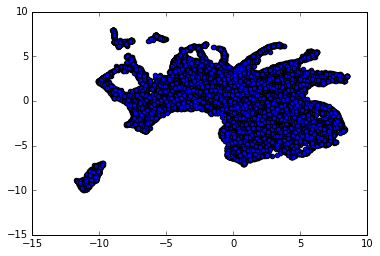

In [43]:
%matplotlib inline
import matplotlib.pyplot

print matplotlib.pyplot.scatter(x,y)

In [44]:
everything.to_csv("merged.csv")

# Scratch

What follows below is some code used for debugging and finding problems. Not to be run.

In [12]:
state = "ND"
alperin,wiki,cesta = state_counts(state)
alp_wik = mf.merge_two_sets(alperin,wiki)

362 matches between the sets


In [13]:
for m in matches:    
    if m["n_matches"] < m["possible_overlaps"]:
        print ""
        print a[0]["Alperin_Place"].iloc[m['a']]
        print b[0]["CityST"].iloc[m['b']]

        y = 1790
        last_print = 0
        a_ = list(a[1][m['a']])
        b_ = list(b[1][m['b']])
        for k in range(23):
            i = a_[k]
            j = b_[k]
            if i > 0 and j > 0:
                do_printout = False
                for k_ in [-1,0,1]:
                    try: 
                        i_ = a_[k + k_]
                        j_ = b_[k + k_]
                    except IndexError:
                        continue
                    if i_ != j_ and (i_ > 0 or j_ > 0): 
                        do_printout = True
                if do_printout:
                    print y,i,j,"*"*int(i!=j)*4
            y += 10


Eastport


KeyError: 'CityST'

In [14]:


st = "CA"
cesta_maine = (CESTA[CESTA.ST==st],c_mat[CESTA.ST == st])
wiki_maine = state_wikipedia_data(st)


print "CA Towns in CESTA missing from my Wikipedia parse"
for i,k in match_matrices(cesta_maine[1],wiki_maine[1],min=2):
    if k is None:
        if cesta_maine[1][i][19] > 0:
            print cesta_maine[0].iloc[i]["CityST"]
    else:
        for j in k:
            pass
            #print alperin_maine[0].iloc[i]["Place"], "=", wiki_maine[0].iloc[j]["title"]
print ""
print "="*80
print ""
print "CA Towns in Wikipedia missing from my CESTA parse"
print "-" * 20
a_not_b = []
for i,k in match_matrices(wiki_maine[1],alperin_maine[1],min=2):
    if k is None:
        if wiki_maine[1][i][19] > 0:
            print wiki_maine[0].iloc[i]["title"]
    else:
        for j in k:
            pass
st = "CA"
cesta_maine = (CESTA[CESTA.ST==st],c_mat[CESTA.ST == st])
wiki_maine = state_wikipedia_data(st)
            #print alperin_maine[0].iloc[i]["Place"], "=", wiki_maine[0].iloc[j]["title"]

NameError: name 'CESTA' is not defined

In [ ]:
st = "ME"
cesta_maine = (CESTA[CESTA.ST==st],c_mat[CESTA.ST == st])
wiki_maine = state_wikipedia_data(st)

def summary_match(a,b,a_names = None,b_names = None,min=2):
    p = match_matrices(a,b,min=min)
    a_not_b = 0
    for i,k in match_matrices(a,b,min=min):
        if k is None:
            a_not_b += 1
    b_not_a = 0
    for i,k in match_matrices(b,a,min=min):
        if k is None:
            b_not_a += 1
    print "{} of {} unique to set A, {} of {} unique to set B".format(a_not_b,len(a),b_not_a,len(b))

summary_match(cesta_maine[1],(all_together[all_together["state"]==st],jacob_mat[all_together["state"] == st])
[1])
cesta_maine

In [15]:
print wiki_maine[0][wiki_maine[0].title=="Chebeague Island, Maine"]
alperin_maine[0][alperin_maine[0].Place=="Chebeague Island"]["1990"]

NameError: name 'wiki_maine' is not defined

In [ ]:
altered_array = array.clip(2500)

cesta_crosswalk = match_matrices(array,c_mat)

In [ ]:
j = 0
misses = []
for i,matches in cesta_crosswalk:
    if matches is None:
        if c_mat[i][19] > 0:
            misses.append(i)
            j += 1
            print j,i,CESTA.iloc[i]["CityST"], ", ".join([str(int(p)) for p in list(c_mat[i]) if not np.isnan(p)])
            f = c_mat[0]


In [ ]:
print len(misses)
random.seed(3)
sampled = random.sample(misses,10)

In [ ]:
i = sampled[0]
place, pops = CESTA.iloc[i]["CityST"], ", ".join([str(int(p)) if not np.isnan(p) else "0" for p in list(c_mat[i])])
print place,"--", pops

print frame[frame.title=="Brunswick, Maine"]

So after digging around, it seems that CESTA reports statistics for the Brunswick CDP, (but rounded to the nearest 100?), while Wikipedia gives the statistics for Brunswick Town. The difference being a second CDP,   https://en.wikipedia.org/wiki/Brunswick_Station,_Maine

In [ ]:
i = sampled[1]
place, pops = CESTA.iloc[i]["CityST"], ", ".join([str(int(p)) if not np.isnan(p) else "0" for p in list(c_mat[i])])
print place,"--", pops

print frame[frame.title=="Lakewood Township, New Jersey"]

In [ ]:
CESTA = pd.read_csv("../MiscData/CESTACityData.csv")
CESTA["2010"] = pd.to_numeric(CESTA["2010"],np.float64)
c_mat = np.array(CESTA[[str(y) for y in years]])
c_mat[c_mat < 2500] = np.nan
c_mat[c_mat==0] = np.nan


In [ ]:
print sum(sum(c_mat>0))
print sum(sum(array>0))

Now I want to load the data from the wikipedia editor DemocraticLuntz, which is not the same as the full wikipedia set.

There's a straightforward disagreement in at least this one case.

In [ ]:
a = frame[frame["title"]=="Princeton, Indiana"].index[0]
b = CESTA[CESTA.CityST == "Princeton, IN"].index[0]
zip(
    list(array[a]),
    list(c_mat[b])
)

Indana.gov says:
    6,041	6,448	7,132	7,505	7,786	7,673	7,906	7,431	8,976	8,127	8,175	8,644
    
IOW, agrees with the CESTA data.
So does the Census report.
So does jacobmas's data. It seems this is an anonymous wikipedia editor in 2007, who put in 
[an absurdly high current population](https://en.wikipedia.org/w/index.php?title=Princeton,_Indiana&diff=187475063&oldid=183213818) and just a whole bunch of bad (made-up?) numbers from before.'
|1850= 806
|1860= 1397
|1870= 1847
|1880= 2566
|1890= 3076
|1900= 6041
|1910= 6448
|1920= 7132
|1930= 7505
|1940= 7786
|1950= 7673
|1960= 7906
|1970= 7431
|1980= 8976
|1990= 8127
|2000= 8175
|2010= 8644
|2020= 8608


Save to disk

Confirm that requiring at least 3 matches produces no hash collisions

In [ ]:
c_self = match_matrices(c_mat,c_mat,2)

In [ ]:
for row,matches in c_self:
    try:
        if len(matches) != 1:
            print row,matches
    except:
        continue

It does not. The only collision is lines 1 and 2, because the Lahnmeyer data rounds to 100 for Alaskan towns. 8227 and 570 are both Lake Elsinore, CA. 

In [ ]:
CESTA.iloc[8227]